# Pytorch Fashion

* 准备数据集
* 用Class定义模型（继承自nn.Module)
* 构建loss和optimizer（用Pytorch API）
* Training cycle（前馈forward，反馈backward，更新update）

注：mini-batch风格，计算图构建用矩阵运算（广播）

# 线性回归

### 1、准备数据

In [65]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个(x,y)数据，每个数据只有1个特征(x均为1维向量，y是标签)
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

### 2、设计模型

In [66]:
class LinearModel(torch.nn.Module):
    # 构造任何模型都是用这个模板，继承torch.nn.Module
    def __init__(self):
        ''' 必须要有这个方法，即初始化对象用的构造函数 '''
        super(LinearModel, self).__init__() # 调用父类的构造
        self.linear = torch.nn.Linear(1, 1) # 构造Linear对象
        '''
            torch.nn.Linear对象包含weight和bias两个成员Tensor
            即一个线性单元：类似函数可callable，用于完成【.w再+b】的操作
            这两个Tensor显然也是可以反向传播求梯度的
        '''
        
    def forward(self, x):
        ''' 
        必须要重写forward 
        Module有__call__魔法方法，使得类的实例可以像函数一样使用
        该方法就是调用forward(self)，所以我们在自己的模型中必须重写forward
        因此：model = LinearModel()实例化后时callable的，即可以直接使用model(x)用于模型推理
        '''
        y_pred = self.linear(x)
        return y_pred
    
    # 注：重写计算模块时，可以继承Functions类

In [67]:
help(torch.nn.Linear)
'''
 |  Args:
 |      in_features: size of each input sample 输入维数
 |      out_features: size of each output sample 输出维数
 |      bias: If set to False, the layer will not learn an additive bias. 是否含有偏置
 |          Default: ``True``
'''

Help on class Linear in module torch.nn.modules.linear:

class Linear(torch.nn.modules.module.Module)
 |  Applies a linear transformation to the incoming data: :math:`y = Ax + b`
 |  
 |  Args:
 |      in_features: size of each input sample
 |      out_features: size of each output sample
 |      bias: If set to False, the layer will not learn an additive bias.
 |          Default: ``True``
 |  
 |  Shape:
 |      - Input: :math:`(N, *, in\_features)` where :math:`*` means any number of
 |        additional dimensions
 |      - Output: :math:`(N, *, out\_features)` where all but the last dimension
 |        are the same shape as the input.
 |  
 |  Attributes:
 |      weight: the learnable weights of the module of shape
 |          `(out_features x in_features)`
 |      bias:   the learnable bias of the module of shape `(out_features)`
 |  
 |  Examples::
 |  
 |      >>> m = nn.Linear(20, 30)
 |      >>> input = torch.randn(128, 20)
 |      >>> output = m(input)
 |      >>> print(outp

'\n |  Args:\n |      in_features: size of each input sample 输入维数\n |      out_features: size of each output sample 输出维数\n |      bias: If set to False, the layer will not learn an additive bias. 是否含有偏置\n |          Default: ``True``\n'

In [68]:
model = LinearModel() # 实例化

### 3、构建loss和optimizer

In [84]:
criterion = torch.nn.MSELoss(size_average=True) 
# 还有一个reduce参数表示维度是否下降，一般不考虑
# 这里就是预测向量y hat和实际向量y之间求均方误差，结果是标量

In [85]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [86]:
help(torch.optim.SGD)
'''
 |  Args:
 |      params (iterable): iterable of parameters to optimize or dicts defining
 |          parameter groups 意义在于将含有weight权重成员的模型参数加入优化器最终要训练的集合中
                             这些参数会在backward中梯度下降！！！！
 |      lr (float): learning rate 学习率
 |      momentum (float, optional): momentum factor (default: 0)
 |      weight_decay (float, optional): weight decay (L2 penalty) (default: 0) L2正则化
 |      dampening (float, optional): dampening for momentum (default: 0)
 |      nesterov (bool, optional): enables Nesterov momentum (default: False)
'''

Help on class SGD in module torch.optim.sgd:

class SGD(torch.optim.optimizer.Optimizer)
 |  Implements stochastic gradient descent (optionally with momentum).
 |  
 |  Nesterov momentum is based on the formula from
 |  `On the importance of initialization and momentum in deep learning`__.
 |  
 |  Args:
 |      params (iterable): iterable of parameters to optimize or dicts defining
 |          parameter groups
 |      lr (float): learning rate
 |      momentum (float, optional): momentum factor (default: 0)
 |      weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
 |      dampening (float, optional): dampening for momentum (default: 0)
 |      nesterov (bool, optional): enables Nesterov momentum (default: False)
 |  
 |  Example:
 |      >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
 |      >>> optimizer.zero_grad()
 |      >>> loss_fn(model(input), target).backward()
 |      >>> optimizer.step()
 |  
 |  __ http://www.cs.toronto.edu/%7

'\n |  Args:\n |      params (iterable): iterable of parameters to optimize or dicts defining\n |          parameter groups 意义在于将含有weight权重成员的模型参数加入优化器最终要训练的集合中\n                             这些参数会在backward中梯度下降！！！！\n |      lr (float): learning rate 学习率\n |      momentum (float, optional): momentum factor (default: 0)\n |      weight_decay (float, optional): weight decay (L2 penalty) (default: 0) L2正则化\n |      dampening (float, optional): dampening for momentum (default: 0)\n |      nesterov (bool, optional): enables Nesterov momentum (default: False)\n'

### 4、Training cycle: 前馈（y_pred和loss），（清零），反馈，更新

In [87]:
for epoch in range(100):
    y_pred = model(x_data) 
    '''
    注意！SGD优化器就是梯度下降优化器
    无论是 批量梯度下降（全体样本计算损失函数后对loss反向传播）/随机梯度下降（随机单个样本）/mini-batch梯度下降（部分）
    都用SGD！只取决于输入给model的是什么！
    这里 model(x_data) 说明直接给模型输入了全体数据，计算的损失函数自然也是全体的
    '''
    
    
    loss = criterion(y_pred, y_data)
    print(epoch, loss)
    
    optimizer.zero_grad() # 清空梯度
    loss.backward() # 反向传播
    optimizer.step() # 更新权重（梯度下降）

0 tensor(1.00000e-07 *
       5.7372)
1 tensor(1.00000e-07 *
       5.6990)
2 tensor(1.00000e-07 *
       5.6655)
3 tensor(1.00000e-07 *
       5.6339)
4 tensor(1.00000e-07 *
       5.6010)
5 tensor(1.00000e-07 *
       5.5713)
6 tensor(1.00000e-07 *
       5.5410)
7 tensor(1.00000e-07 *
       5.5128)
8 tensor(1.00000e-07 *
       5.4847)
9 tensor(1.00000e-07 *
       5.4565)
10 tensor(1.00000e-07 *
       5.4294)
11 tensor(1.00000e-07 *
       5.4025)
12 tensor(1.00000e-07 *
       5.3762)
13 tensor(1.00000e-07 *
       5.3483)
14 tensor(1.00000e-07 *
       5.3248)
15 tensor(1.00000e-07 *
       5.2959)
16 tensor(1.00000e-07 *
       5.2724)
17 tensor(1.00000e-07 *
       5.2461)
18 tensor(1.00000e-07 *
       5.2198)
19 tensor(1.00000e-07 *
       5.1954)
20 tensor(1.00000e-07 *
       5.1711)
21 tensor(1.00000e-07 *
       5.1447)
22 tensor(1.00000e-07 *
       5.1211)
23 tensor(1.00000e-07 *
       5.0975)
24 tensor(1.00000e-07 *
       5.0702)
25 tensor(1.00000e-07 *
       5.04

### 打印权重和偏置

In [88]:
print('w =', model.linear.weight.item())
print('b =', model.linear.bias.item())

w = 1.999310851097107
b = 0.0015660704812034965


### 测试模型

In [89]:
x_test = torch.Tensor([[4.0],[5.0]]) # test的格式依旧要满足这个格式：几行代表几个样本，每行有几列代表输入向量的维数
y_test = model(x_test)
print('y_pred = ', y_test.data)

y_pred =  tensor([[ 7.9988],
        [ 9.9981]])


# 逻辑回归 Logistic Regression

### <font color='red'> 虽然叫回归，其实是做分类问题的！模型的输出是每个class的概率

In [3]:
import torch

In [4]:
import torch.nn.functional as F
# 这个函数包包含了很多有用的函数

In [5]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

In [8]:
model = LogisticRegressionModel()

In [6]:
criterion = torch.nn.BCELoss(size_average=False)
# 设为True，意味着loss = -(1/N) * N个样本BCE损失的累加
# 那这样一个系数(1/N)显然在求导时会保留，对我们设置学习率显然会产生影响

In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# 我发现Adam确实比纯梯度下降SGD好很多

In [21]:
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[0.0], [0.0], [1.0]]) 
# 分类问题中，也要注意训练集x和y tensor的格式！
# 每行代表一个固定维数的向量！即整体是矩阵形式，每个样本的x/y即每个行向量
# 注意！尽量使用浮点型tensor！写整型可能会报错（比如这里计算BCE时，y_pred是float型向量，target的y_data如果是0，1即long型张量会报错！

In [22]:
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.12043005228042603
1 0.1203174814581871
2 0.12020499259233475
3 0.12009277939796448
4 0.11998060345649719
5 0.11986860632896423
6 0.11975675821304321
7 0.11964506655931473
8 0.1195334792137146
9 0.1194220781326294
10 0.11931079626083374
11 0.11919969320297241
12 0.11908867210149765
13 0.11897792667150497
14 0.11886724084615707
15 0.11875665187835693
16 0.11864627152681351
17 0.11853599548339844
18 0.11842594295740128
19 0.11831596493721008
20 0.11820613592863083
21 0.11809647083282471
22 0.11798694729804993
23 0.11787759512662888
24 0.1177682876586914
25 0.11765914410352707
26 0.11755022406578064
27 0.11744140833616257
28 0.11733267456293106
29 0.11722413450479507
30 0.11711576581001282
31 0.11700750142335892
32 0.11689939349889755
33 0.11679136008024216
34 0.11668354272842407
35 0.11657586693763733
36 0.11646831035614014
37 0.1163608655333519
38 0.116253562271595
39 0.11614641547203064
40 0.11603938788175583
41 0.11593251675367355
42 0.11582577228546143
43 0.11571919918060303
44 0.

717 0.06599801033735275
718 0.06594762951135635
719 0.06589726358652115
720 0.06584702432155609
721 0.06579678505659103
722 0.06574659794569016
723 0.06569645553827286
724 0.06564640253782272
725 0.06559636443853378
726 0.06554637849330902
727 0.06549645215272903
728 0.06544657051563263
729 0.0653967335820198
730 0.06534691900014877
731 0.0652971938252449
732 0.06524749845266342
733 0.06519786268472672
734 0.06514827907085419
735 0.06509873270988464
736 0.06504926830530167
737 0.06499981880187988
738 0.06495039910078049
739 0.06490109115839005
740 0.06485173851251602
741 0.06480250507593155
742 0.06475331634283066
743 0.06470420211553574
744 0.06465505808591843
745 0.06460600346326828
746 0.06455698609352112
747 0.06450801342725754
748 0.06445908546447754
749 0.06441020220518112
750 0.06436139345169067
751 0.064312644302845
752 0.06426388025283813
753 0.06421518325805664
754 0.0641665831208229
755 0.06411799043416977
756 0.0640694722533226
757 0.06402098387479782
758 0.0639725103974342

In [34]:
''' 模型测试 '''
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view(200,1) # 这里很重要！view类似于reshape
# x转化为张量后是一个1*200的【行向量】，我们要转换为200行1列的【矩阵】作为输入！！
# 输出也是矩阵形式
y_t = model(x_t)
y = y_t.data.numpy() # 注意y的结果是一个200行1列的矩阵，即200个行向量，对应200个输入的输出
print(y)

[[4.4469061e-06]
 [5.7216093e-06]
 [7.3617025e-06]
 [9.4719135e-06]
 [1.2187015e-05]
 [1.5680380e-05]
 [2.0175088e-05]
 [2.5958123e-05]
 [3.3398799e-05]
 [4.2972188e-05]
 [5.5289529e-05]
 [7.1137205e-05]
 [9.1526810e-05]
 [1.1775998e-04]
 [1.5151087e-04]
 [1.9493316e-04]
 [2.5079673e-04]
 [3.2266468e-04]
 [4.1511847e-04]
 [5.3404883e-04]
 [6.8702933e-04]
 [8.8379288e-04]
 [1.1368445e-03]
 [1.4622457e-03]
 [1.8806108e-03]
 [2.4183863e-03]
 [3.1094621e-03]
 [3.9972300e-03]
 [5.1371539e-03]
 [6.6000060e-03]
 [8.4758652e-03]
 [1.0879049e-02]
 [1.3954017e-02]
 [1.7882423e-02]
 [2.2891078e-02]
 [2.9260827e-02]
 [3.7335318e-02]
 [4.7528863e-02]
 [6.0331043e-02]
 [7.6305449e-02]
 [9.6076913e-02]
 [1.2030422e-01]
 [1.4962952e-01]
 [1.8460310e-01]
 [2.2558251e-01]
 [2.7261758e-01]
 [3.2533967e-01]
 [3.8289040e-01]
 [4.4392315e-01]
 [5.0669652e-01]
 [5.6925952e-01]
 [6.2968653e-01]
 [6.8630803e-01]
 [7.3787600e-01]
 [7.8363907e-01]
 [8.2332546e-01]
 [8.5706037e-01]
 [8.8525152e-01]
 [9.0847635e-0

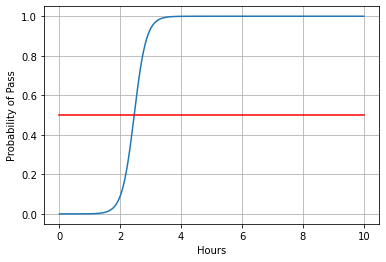

In [24]:
plt.plot(x, y)
plt.plot([0,10], [0.5,0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

# 多维特征输入的处理

### 简单Logistic实现的8维输入的二分类

In [35]:
import torch

In [37]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(8, 1) # Linear Unit中输入数据为8维，输出为标量
        self.sigmoid = torch.nn.Sigmoid() # 这里Sigmoid依然是一个可以当作函数被call的类
    
    def forward(self, x):
        x = self.sigmoid(self.linear(x))
        return x

In [38]:
model = Model()

### 人工神经网络（糖尿病二分类）

In [78]:
import numpy as np

In [79]:
# np.loadtxt是可以解析.gz的，不一定非要解压成.csv文件
xy = np.loadtxt('./datasets/diabetes.csv.gz', delimiter=',', dtype=np.float32)
# xy为矩阵，每个行向量前面为特征，最后一列为类别（0/1）
# 神经网络一般都用32位浮点数，游戏显卡一般只支持32位浮点数

x_data = torch.Tensor(xy[:, :-1]) # 或者可以用torch.from_numpy: ndarray -> Tensor
y_data = torch.Tensor(xy[:, [-1]])
# 注意！这里切片的时候加上[-1]的意义在于这是一个【矩阵】，只用-1的话就是一个【列向量】

In [80]:
import torch

In [81]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() 
        # Sigmoid类也是继承自Module，但是没有参数成员，所以梯度下降时没有训练的
        # 这里不用纯函数，而是用类，意义在于激活函数也看作神经网络计算图的一层
    
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

In [82]:
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [87]:
# 注意：这里目前还是整体训练，之后会batch训练
for epoch in range(1000):
    # Forward
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print('Epoch:{} Loss:{}'.format(epoch, loss.item()))
    
    # Backward
    optimizer.zero_grad()
    loss.backward()
    
    # Update
    optimizer.step()

Epoch:0 Loss:0.312819242477417
Epoch:1 Loss:0.3128189146518707
Epoch:2 Loss:0.3128180503845215
Epoch:3 Loss:0.31281760334968567
Epoch:4 Loss:0.31281769275665283
Epoch:5 Loss:0.3128177523612976
Epoch:6 Loss:0.3128169775009155
Epoch:7 Loss:0.3128168284893036
Epoch:8 Loss:0.3128160536289215
Epoch:9 Loss:0.3128163516521454
Epoch:10 Loss:0.3128156363964081
Epoch:11 Loss:0.3128156363964081
Epoch:12 Loss:0.3128150403499603
Epoch:13 Loss:0.3128148019313812
Epoch:14 Loss:0.3128136098384857
Epoch:15 Loss:0.3128134310245514
Epoch:16 Loss:0.31281280517578125
Epoch:17 Loss:0.31281211972236633
Epoch:18 Loss:0.3128105401992798
Epoch:19 Loss:0.3128097653388977
Epoch:20 Loss:0.3128097951412201
Epoch:21 Loss:0.3128076195716858
Epoch:22 Loss:0.31280580163002014
Epoch:23 Loss:0.31280508637428284
Epoch:24 Loss:0.31280267238616943
Epoch:25 Loss:0.31280142068862915
Epoch:26 Loss:0.312798410654068
Epoch:27 Loss:0.3127945065498352
Epoch:28 Loss:0.3127897381782532
Epoch:29 Loss:0.31278300285339355
Epoch:30 Loss

Epoch:274 Loss:0.31255075335502625
Epoch:275 Loss:0.31254956126213074
Epoch:276 Loss:0.3125494122505188
Epoch:277 Loss:0.31254902482032776
Epoch:278 Loss:0.3125487267971039
Epoch:279 Loss:0.3125486969947815
Epoch:280 Loss:0.3125482201576233
Epoch:281 Loss:0.3125479817390442
Epoch:282 Loss:0.31254786252975464
Epoch:283 Loss:0.31254759430885315
Epoch:284 Loss:0.3125474154949188
Epoch:285 Loss:0.3125472366809845
Epoch:286 Loss:0.3125472068786621
Epoch:287 Loss:0.3125467896461487
Epoch:288 Loss:0.31254667043685913
Epoch:289 Loss:0.31254610419273376
Epoch:290 Loss:0.31254616379737854
Epoch:291 Loss:0.3125455677509308
Epoch:292 Loss:0.31254565715789795
Epoch:293 Loss:0.3125453591346741
Epoch:294 Loss:0.3125452399253845
Epoch:295 Loss:0.31254372000694275
Epoch:296 Loss:0.3125438392162323
Epoch:297 Loss:0.31254351139068604
Epoch:298 Loss:0.31254321336746216
Epoch:299 Loss:0.31254297494888306
Epoch:300 Loss:0.31254351139068604
Epoch:301 Loss:0.3125430941581726
Epoch:302 Loss:0.31254318356513977

Epoch:566 Loss:0.31249144673347473
Epoch:567 Loss:0.31249135732650757
Epoch:568 Loss:0.31249117851257324
Epoch:569 Loss:0.31249094009399414
Epoch:570 Loss:0.3124907910823822
Epoch:571 Loss:0.3124905526638031
Epoch:572 Loss:0.31249043345451355
Epoch:573 Loss:0.3124902844429016
Epoch:574 Loss:0.31249016523361206
Epoch:575 Loss:0.31248998641967773
Epoch:576 Loss:0.3124898374080658
Epoch:577 Loss:0.3124896287918091
Epoch:578 Loss:0.3124895393848419
Epoch:579 Loss:0.31248942017555237
Epoch:580 Loss:0.3124893009662628
Epoch:581 Loss:0.31248927116394043
Epoch:582 Loss:0.31248900294303894
Epoch:583 Loss:0.31248870491981506
Epoch:584 Loss:0.3124884366989136
Epoch:585 Loss:0.31248828768730164
Epoch:586 Loss:0.3124881088733673
Epoch:587 Loss:0.3124878406524658
Epoch:588 Loss:0.3124876022338867
Epoch:589 Loss:0.31248748302459717
Epoch:590 Loss:0.31248739361763
Epoch:591 Loss:0.3124873638153076
Epoch:592 Loss:0.31248724460601807
Epoch:593 Loss:0.31248679757118225
Epoch:594 Loss:0.3124867379665375
E

Epoch:838 Loss:0.34781986474990845
Epoch:839 Loss:0.347696989774704
Epoch:840 Loss:0.34753578901290894
Epoch:841 Loss:0.34740909934043884
Epoch:842 Loss:0.3474592864513397
Epoch:843 Loss:0.3482057750225067
Epoch:844 Loss:0.3506859242916107
Epoch:845 Loss:0.3508593440055847
Epoch:846 Loss:0.34736400842666626
Epoch:847 Loss:0.3550426959991455
Epoch:848 Loss:0.34786495566368103
Epoch:849 Loss:0.3506605625152588
Epoch:850 Loss:0.3461874723434448
Epoch:851 Loss:0.3490995466709137
Epoch:852 Loss:0.34555521607398987
Epoch:853 Loss:0.34781768918037415
Epoch:854 Loss:0.34638741612434387
Epoch:855 Loss:0.3468265235424042
Epoch:856 Loss:0.34464502334594727
Epoch:857 Loss:0.34418871998786926
Epoch:858 Loss:0.34340593218803406
Epoch:859 Loss:0.3437170386314392
Epoch:860 Loss:0.34332922101020813
Epoch:861 Loss:0.3426172435283661
Epoch:862 Loss:0.342016339302063
Epoch:863 Loss:0.3417193293571472
Epoch:864 Loss:0.34165623784065247
Epoch:865 Loss:0.34118130803108215
Epoch:866 Loss:0.34030112624168396
E